In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#ZADANIE 1

In [3]:
def gradient_descent(gradient, start, learn_rate, n_iter = 50, tolerance = 1e-06):
    vector = start
    points = []
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector)
        points.append(vector)
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
    return points

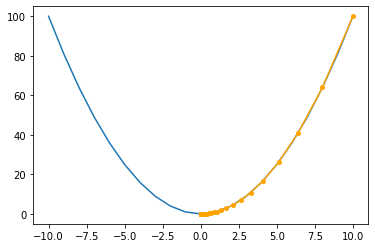

In [4]:
X = np.arange(-10,11,1)
Y = list(map(lambda x: x**2, X))

points = gradient_descent(lambda x: 2*x, start = 10, learn_rate = 0.1)

plt.plot(X,Y)
plt.plot(points, list(map(lambda x: x**2, points)), '-o', markersize = 4, color='orange')

In [5]:
#jesli nic nie zwroci to znaczy ze jest dobrze, jesli bedzie zle wyskoczy blad
assert round(gradient_descent(lambda x: 2*x, start = 10, learn_rate = 0.1)[-1]) == 0,'Minimum jest w punkcie 0'

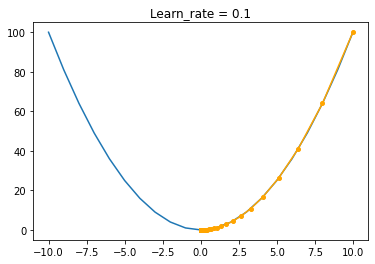

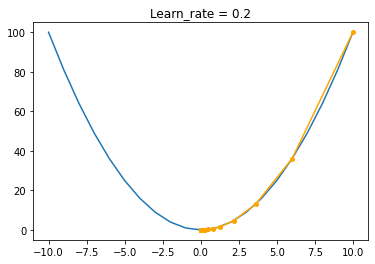

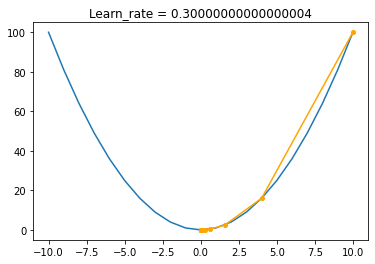

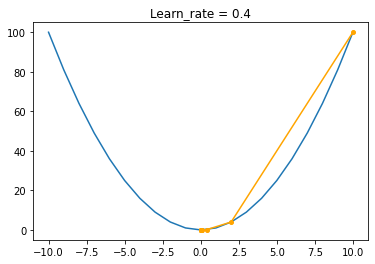

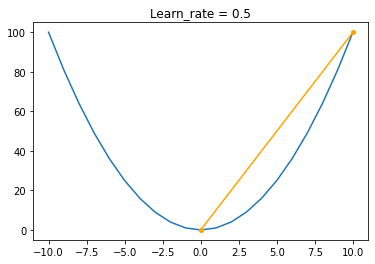

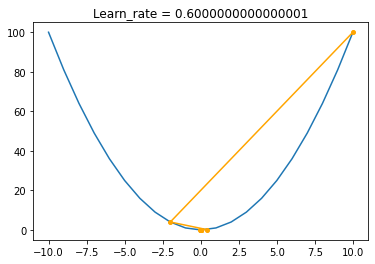

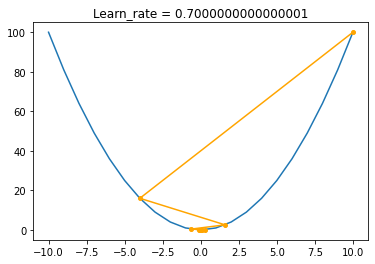

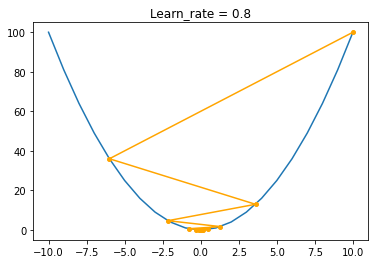

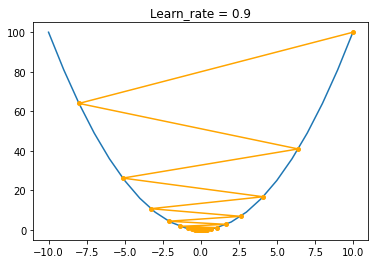

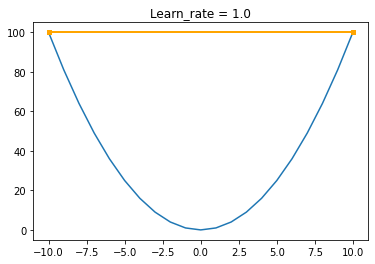

In [6]:
for i in range(1,11):
    lr = 0.1 * i
    plt.figure()
    points = gradient_descent(lambda x: 2*x, start = 10, learn_rate = lr)
    X = np.arange(-10,11,1)
    Y = list(map(lambda x: x**2, X))
    plt.plot(X,Y)
    plt.plot(points, list(map(lambda x: x**2, points)), '-o', markersize = 4, color='orange')
    plt.title('Learn_rate = ' + str(lr))

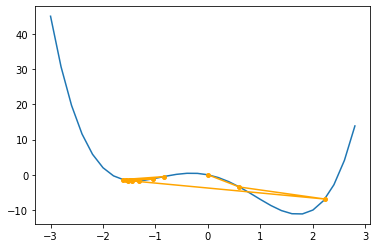

In [7]:
X = np.arange(-3,3,0.2)
Y = list(map(lambda x: x**4 - 5*x**2 - 3*x, X))

points = gradient_descent(lambda x: 4 * x **3 - 10 * x - 3, start = 0, learn_rate = 0.2, n_iter = 10)

plt.plot(X,Y)
plt.plot(points, list(map(lambda x: x**4 - 5*x**2 - 3*x, points)), '-o', markersize = 4, color='orange')

In [8]:
#ZADANIE 2

In [9]:
def gradient_descent(
    gradient, x, y, start, learn_rate=0.1, n_iter=50, tolerance=1e-06
):
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * np.array(gradient(x, y, vector))
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
    return vector

In [10]:
def ssr_gradient(x, y, b):
    res = b[0] + b[1] * x - y
    return res.mean(), (res * x).mean()

In [11]:
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])

gradient_descent(ssr_gradient, x, y, start=[0.5, 0.5], learn_rate=0.0008, n_iter=100_000)

array([5.62822349, 0.54012867])

In [13]:
assert round(gradient_descent(ssr_gradient,x,y,start=[0.5,0.5],learn_rate=0.0008,n_iter=100_000)[0],2) == 5.63,'Beta = 5.63'

In [15]:
assert round(gradient_descent(ssr_gradient,x,y,start=[0.5,0.5],learn_rate=0.0008,n_iter=100_000)[1],2) == 0.54,'Beta = 5.63'

In [16]:
#ZADANIE 4

In [17]:
import numpy as np

def sgd(
    gradient, x, y, start, learn_rate=0.1, batch_size=1, n_iter=50,
    tolerance=1e-06, dtype="float64", random_state=None
):
    # Checking if the gradient is callable
    if not callable(gradient):
        raise TypeError("'gradient' must be callable")

    # Setting up the data type for NumPy arrays
    dtype_ = np.dtype(dtype)

    # Converting x and y to NumPy arrays
    x, y = np.array(x, dtype=dtype_), np.array(y, dtype=dtype_)
    n_obs = x.shape[0]
    if n_obs != y.shape[0]:
        raise ValueError("'x' and 'y' lengths do not match")
    xy = np.c_[x.reshape(n_obs, -1), y.reshape(n_obs, 1)]

    # Initializing the random number generator
    seed = None if random_state is None else int(random_state)
    rng = np.random.default_rng(seed=seed)

    # Initializing the values of the variables
    vector = np.array(start, dtype=dtype_)

    # Setting up and checking the learning rate
    learn_rate = np.array(learn_rate, dtype=dtype_)
    if np.any(learn_rate <= 0):
        raise ValueError("'learn_rate' must be greater than zero")

    # Setting up and checking the size of minibatches
    batch_size = int(batch_size)
    if not 0 < batch_size <= n_obs:
        raise ValueError(
            "'batch_size' must be greater than zero and less than "
            "or equal to the number of observations"
        )

    # Setting up and checking the maximal number of iterations
    n_iter = int(n_iter)
    if n_iter <= 0:
        raise ValueError("'n_iter' must be greater than zero")

    # Setting up and checking the tolerance
    tolerance = np.array(tolerance, dtype=dtype_)
    if np.any(tolerance <= 0):
        raise ValueError("'tolerance' must be greater than zero")

    # Performing the gradient descent loop
    for _ in range(n_iter):
        # Shuffle x and y
        rng.shuffle(xy)

        # Performing minibatch moves
        for start in range(0, n_obs, batch_size):
            stop = start + batch_size
            x_batch, y_batch = xy[start:stop, :-1], xy[start:stop, -1:]

            # Recalculating the difference
            grad = np.array(gradient(x_batch, y_batch, vector), dtype_)
            diff = -learn_rate * grad

            # Checking if the absolute difference is small enough
            if np.all(np.abs(diff) <= tolerance):
                break

            # Updating the values of the variables
            vector += diff

    return vector if vector.shape else vector.item()

In [18]:
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])

coef_fa = sgd(ssr_gradient, x, y, start = [0.5, 0.5], learn_rate = 0.0008, n_iter = 100_000)
coef = gradient_descent(ssr_gradient, x, y, start=[0.5, 0.5], learn_rate = 0.0008, n_iter = 100_000)

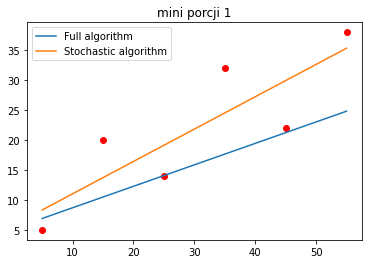

In [15]:
plt.scatter(x,y, color = 'red')
x_f = np.arange(5,56,1)
plt.plot(x_f, list(map(lambda v: coef_fa[1]*v + coef_fa[0], x_f)), label = 'Full algorithm')
plt.plot(x_f, list(map(lambda v: coef[1]*v + coef[0], x_f)), label = 'Stochastic algorithm')
plt.title('mini porcji 1')
plt.legend()

In [19]:
x = np.array([5, 15, 25, 35, 45, 55])
y = np.array([5, 20, 14, 32, 22, 38])

coef_fa = sgd(ssr_gradient, x, y, start = [0.5, 0.5], learn_rate = 0.0008, n_iter = 100_000, batch_size = 3)
coef = gradient_descent(ssr_gradient, x, y, start=[0.5, 0.5], learn_rate = 0.0008, n_iter = 100_000)

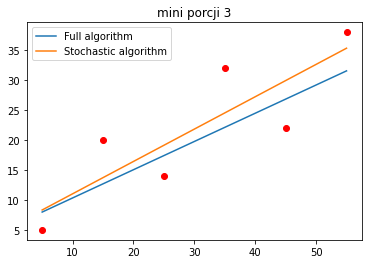

In [20]:
plt.scatter(x,y, color = 'red')
x_f = np.arange(5,56,1)
plt.plot(x_f, list(map(lambda v: coef_fa[1]*v + coef_fa[0], x_f)), label='Full algorithm')
plt.plot(x_f, list(map(lambda v: coef[1]*v + coef[0], x_f)), label='Stochastic algorithm')
plt.title('mini porcji 3')
plt.legend()